In [5]:
import pyspark
import pandas as pd
import numpy as np
import scipy.stats as stats
from pyspark.sql.functions import col, log10
import seaborn as sns

In [6]:
from pyspark.sql import SparkSession, functions as f
import geopandas as gpd

In [7]:
spark = (
    SparkSession.builder.appName("MAST30034 Tutorial 1")
    .config("spark.sql.repl.eagerEval.enabled", True) 
    .config("spark.sql.parquet.cacheMetadata", "true")
    .config("spark.sql.session.timeZone", "Etc/UTC")
    .config("spark.executor.memory", "4g")
    .config("spark.driver.memory", "8g")
    .getOrCreate()
)

# Univariate Analysis

## Yellow -

### Numerical

In [17]:
yellow = spark.read.parquet('../clean_data/yellow_clean.parquet')

In [18]:
from pyspark_dist_explore import hist
import matplotlib.pyplot as plt

In [24]:
yellow.limit(3)

tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,ratecode_id,pulocation_id,dolocation_id,payment_type,fare_amount,tip_amount,total_amount
2022-01-01 00:35:40,2022-01-01 00:53:29,6.08,1.0,142,236,1,20.88,5.255999999999999,31.607999999999997
2022-01-01 00:33:43,2022-01-01 00:42:07,3.3600000000000003,1.0,236,42,1,11.52,5.76,19.152
2022-01-01 00:53:21,2022-01-01 01:02:19,1.552,1.0,166,166,1,10.799999999999999,2.5343999999999998,15.2064


In [33]:
numerical_columns = ['trip_distance', 'fare_amount', 'tip_amount', 'total_amount']

In [30]:
yellow_numerical = yellow.select(yellow['trip_distance'], yellow['fare_amount'], yellow['tip_amount'], yellow['total_amount'])

trip_distance,fare_amount,tip_amount,total_amount
6.08,20.88,5.255999999999999,31.607999999999997


## Log Transformations required for all variables to take an approximate normal distribution (to suit model assumptions)

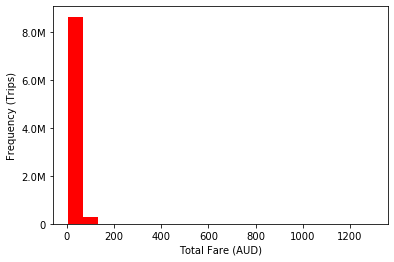

In [35]:
# Code taken from - https://stackoverflow.com/questions/39154325/pyspark-show-histogram-of-a-data-frame-column
# Searched for 'pyspark histogram of column'

fig, ax = plt.subplots()
hist(ax, yellow_numerical.select('total_amount'), bins = 20, color=['red'])
plt.xlabel('Total Fare (AUD)')
plt.ylabel('Frequency (Trips)')
plt.show()

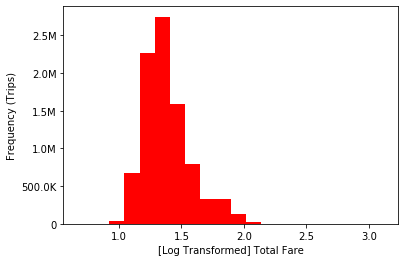

In [40]:
yellow_numerical = yellow_numerical.withColumn("log_total", log10(col("total_amount")))

fig, ax = plt.subplots()
hist(ax, yellow_numerical.select('log_total'), bins = 20, color=['red'])
plt.xlabel('[Log Transformed] Total Fare')
plt.ylabel('Frequency (Trips)')
plt.show()

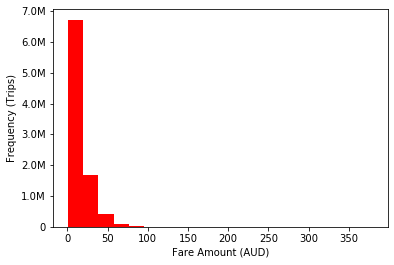

In [36]:
fig, ax = plt.subplots()
hist(ax, yellow_numerical.select('fare_amount'), bins = 20, color=['red'])
plt.xlabel('Fare Amount (AUD)')
plt.ylabel('Frequency (Trips)')
plt.show()

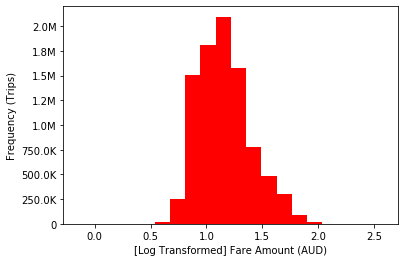

In [41]:
yellow_numerical = yellow_numerical.withColumn("log_fare", log10(col("fare_amount")))

fig, ax = plt.subplots()
hist(ax, yellow_numerical.select('log_fare'), bins = 20, color=['red'])
plt.xlabel('[Log Transformed] Fare Amount (AUD)')
plt.ylabel('Frequency (Trips)')
plt.show()

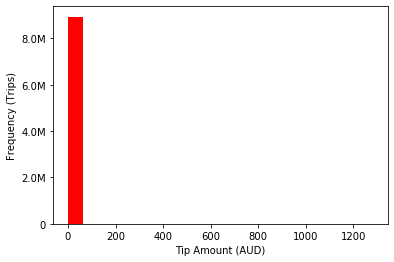

In [37]:
fig, ax = plt.subplots()
hist(ax, yellow_numerical.select('tip_amount'), bins = 20, color=['red'])
plt.xlabel('Tip Amount (AUD)')
plt.ylabel('Frequency (Trips)')
plt.show()

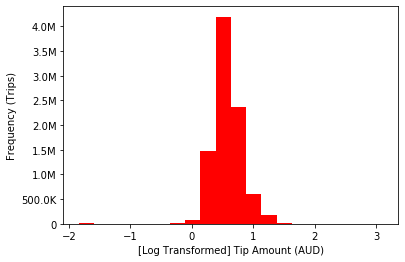

In [42]:
yellow_numerical = yellow_numerical.withColumn("log_tip", log10(col("tip_amount")))

fig, ax = plt.subplots()
hist(ax, yellow_numerical.select('log_tip'), bins = 20, color=['red'])
plt.xlabel('[Log Transformed] Tip Amount (AUD)')
plt.ylabel('Frequency (Trips)')
plt.show()

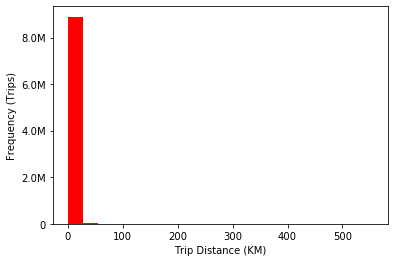

In [43]:
fig, ax = plt.subplots()
hist(ax, yellow_numerical.select('trip_distance'), bins = 20, color=['red'])
plt.xlabel('Trip Distance (KM)')
plt.ylabel('Frequency (Trips)')
plt.show()

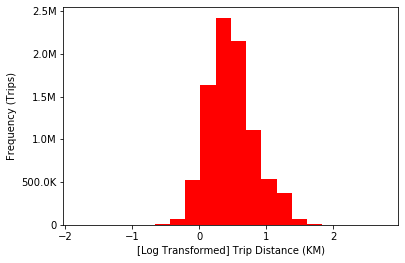

In [39]:
yellow_numerical = yellow_numerical.withColumn("log_distance", log10(col("trip_distance")))

fig, ax = plt.subplots()
hist(ax, yellow_numerical.select('log_distance'), bins = 20, color=['red'])
plt.xlabel('[Log Transformed] Trip Distance (KM)')
plt.ylabel('Frequency (Trips)')
plt.show()

# Dropping original versions of variables. Will pass logged form on to model, need to remember to revert in interpretation

In [78]:
yellow_numerical = yellow_numerical.drop('trip_distance', 'fare_amount', 'tip_amount', 'total_amount')

### Categorical -

In [13]:
yellow_categorical = spark.read.parquet('../clean_data/yellow_categorical')

In [14]:
yellow_categorical.limit(5)

tpep_pickup_datetime,tpep_dropoff_datetime,ratecode_id,pulocation_id,dolocation_id,payment_type
2022-02-01 00:06:58,2022-02-01 00:19:24,1.0,138,252,1
2022-02-01 00:06:48,2022-02-01 00:33:07,1.0,138,125,1
2022-02-01 00:57:23,2022-02-01 01:07:31,1.0,140,142,1
2022-02-01 00:34:17,2022-02-01 01:01:32,1.0,140,36,1
2022-02-01 00:03:26,2022-02-01 00:07:30,1.0,48,68,1


- Join with gdf
- add in borough column
- visualisation of hottest boroughs
- visualisation of hottest zones
- 

# Property -

## Numerical -

In [57]:
property_df = spark.read.parquet('../clean_data/property_clean.parquet')
property_df = property_df.drop('__index_level_0__')

In [58]:
property_df.limit(3)

borough,neighbourhood,building_class,year_built,sale_price,gross_sq_metres
bronx,BATHGATE,01,1952,720000,261.98657280000003
bronx,BATHGATE,01,1910,499999,117.05783040000001
bronx,BATHGATE,01,1910,599000,120.40233984000001


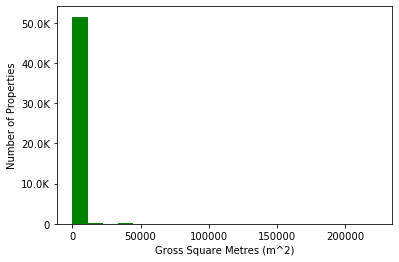

In [59]:
fig, ax = plt.subplots()
hist(ax, property_df.select('gross_sq_metres'), bins = 20, color=['green'])
plt.xlabel('Gross Square Metres (m^2)')
plt.ylabel('Number of Properties')
plt.show()

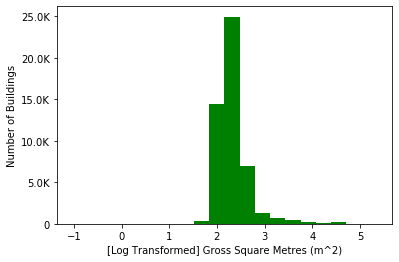

In [60]:
property_df = property_df.withColumn("log_sq_metres", log10(col("gross_sq_metres")))
fig, ax = plt.subplots()
hist(ax, property_df.select('log_sq_metres'), bins = 20, color=['green'])
plt.xlabel('[Log Transformed] Gross Square Metres (m^2)')
plt.ylabel('Number of Buildings')
plt.show()

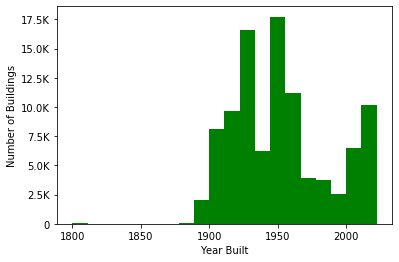

In [61]:
fig, ax = plt.subplots()
hist(ax, property_df.select('year_built'), bins = 20, color=['green'])
plt.xlabel('Year Built')
plt.ylabel('Number of Buildings')
plt.show()

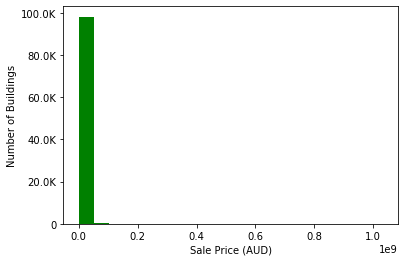

In [94]:
fig, ax = plt.subplots()
hist(ax, property_df.select('sale_price'), bins = 20, color=['green'])
plt.xlabel('Sale Price (AUD)')
plt.ylabel('Number of Buildings')
plt.show()

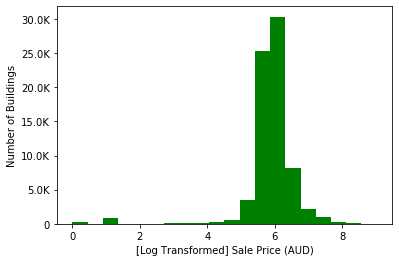

In [95]:
property_df = property_df.withColumn("log_sale_price", log10(col("sale_price")))
fig, ax = plt.subplots()
hist(ax, property_df.select('log_sale_price'), bins = 20, color=['green'])
plt.xlabel('[Log Transformed] Sale Price (AUD)')
plt.ylabel('Number of Buildings')
plt.show()

### Categorical -

In [111]:
yellow.printSchema()

root
 |-- tpep_pickup_datetime: timestamp (nullable = true)
 |-- tpep_dropoff_datetime: timestamp (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- ratecode_id: double (nullable = true)
 |-- pulocation_id: long (nullable = true)
 |-- dolocation_id: long (nullable = true)
 |-- payment_type: long (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- total_amount: double (nullable = true)



In [117]:
from pyspark.sql import functions as F


sdf = yellow.select(F.date_format('tpep_pickup_datetime','yyyy-MM-dd').alias('month')).groupby('month').count()

In [110]:
yellow_categorical = yellow.select(yellow['tpep_pickup_datetime'], yellow['tpep_dropoff_datetime'])

tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,ratecode_id,pulocation_id,dolocation_id,payment_type,fare_amount,tip_amount,total_amount
2022-01-01 00:35:40,2022-01-01 00:53:29,6.08,1.0,142,236,1,20.88,5.255999999999999,31.607999999999997
2022-01-01 00:33:43,2022-01-01 00:42:07,3.3600000000000003,1.0,236,42,1,11.52,5.76,19.152
2022-01-01 00:53:21,2022-01-01 01:02:19,1.552,1.0,166,166,1,10.799999999999999,2.5343999999999998,15.2064
2022-01-01 00:36:48,2022-01-01 01:14:20,6.88,1.0,68,163,1,33.839999999999996,4.32,43.632
2022-01-01 00:40:15,2022-01-01 01:09:48,16.48,1.0,138,161,1,47.519999999999996,18.72,81.144
2022-01-01 00:20:50,2022-01-01 00:34:58,8.112,1.0,233,87,1,24.48,7.4879999999999995,37.44
2022-01-01 00:30:02,2022-01-01 00:44:49,4.336,1.0,166,236,1,17.28,3.2399999999999998,25.992
2022-01-01 00:56:34,2022-01-01 01:12:04,3.4560000000000004,1.0,246,79,1,16.56,4.4064,26.438399999999998
2022-01-01 00:39:46,2022-01-01 00:47:36,2.288,1.0,43,140,1,10.799999999999999,3.2543999999999995,19.5264
2022-01-01 00:33:52,2022-01-01 00:47:28,6.720000000000001,1.0,148,141,1,20.16,4.968,29.88


In [ ]:
yellow_numerical = yellow.select(yellow['trip_distance'], yellow['fare_amount'], yellow['tip_amount'], yellow['total_amount'])

In [99]:
property_categorical = property_df.select(property_df['borough'], property_df['neighbourhood'], property_df['building_class'])

In [100]:
property_numerical = property_df.select(property_df['year_built'], property_df['sale_price'], property_df['log_sq_metres'])

In [101]:
property_categorical.limit(3)

borough,neighbourhood,building_class
bronx,BATHGATE,01
bronx,BATHGATE,01
bronx,BATHGATE,01


In [102]:
building_class = property_categorical.select('building_class').toPandas()

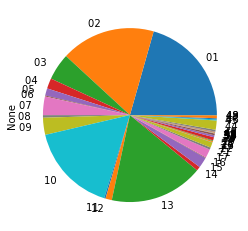

In [103]:
building_class.groupby('building_class').size().plot(kind = 'pie')
plt.show()

In [104]:
property_categorical = property_categorical.select('borough').toPandas()

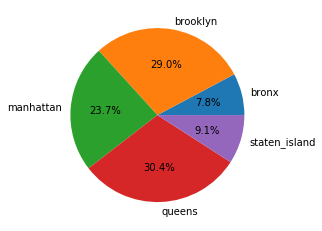

In [105]:
property_categorical.groupby('borough').size().plot(kind = 'pie', autopct = '%1.1f%%')
plt.ylabel('')
plt.show()

# Bivariate

## Yellow

In [79]:
yellow_numerical_pd = yellow_numerical.toPandas()

### Note -

I tried plotting all data points in `yellow_numerical`, but there was far too much data for the visualisation to be useful for anything.

I then tried sampling different percentages of the data and settled on `frac = .001`

In [80]:
# pd.plotting.scatter_matrix(yellow_numerical_pd)
# plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f62098d3340>,
      dtype=object)

Error in callback <function flush_figures at 0x7f6289cd1af0> (for post_execute):


KeyboardInterrupt: 

### Note -

cant figure out how to rotate yticklabels

Have tried:

- ax.set_yticklabels(yellow_numerical_sample.columns, rotation = 90)
- plt.set_yticklabels...
- passing param: rot = 90

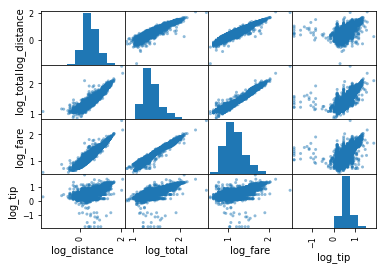

In [85]:
yellow_numerical_sample = yellow_numerical_pd.sample(frac = .001, random_state = 637)
pd.plotting.scatter_matrix(yellow_numerical_sample)
plt.show()

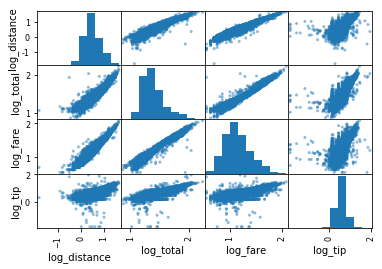

In [86]:
yellow_numerical_sample = yellow_numerical_pd.sample(frac = .001, random_state = 123)
pd.plotting.scatter_matrix(yellow_numerical_sample)
plt.show()

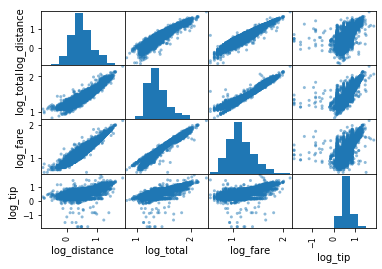

In [87]:
yellow_numerical_sample = yellow_numerical_pd.sample(frac = .001, random_state = 999)
pd.plotting.scatter_matrix(yellow_numerical_sample)
plt.show()

# Get similar plots for different random seeds. Will use the first visualisation in report

In [106]:
property_numerical_pd = property_numerical.toPandas()

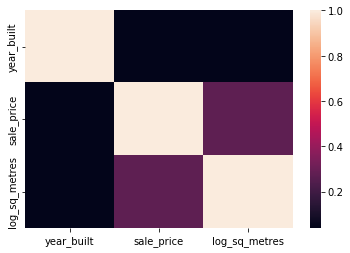

In [109]:
#df = property_numerical_pd.drop(columns = ['sale_price', 'gross_sq_feet', 'gross_sq_metres'])


corr = property_numerical_pd.corr()
sns.heatmap(corr)

Tells us what one wouldv'e though intuitively - sale price is highly correlated with area of the house, but it's always good to confirm instead of assuming

Year built doesn't seem to have a correlation with the sale price at all